<center>
    <h1 style="color: #3498db;">Aplicación de Redes Neuronales Multicapa para la serie del Atleta Colombiano Iván</h1>
</center>

<h2 style="color: #e67e22; text-align: left;">Librerías Necesarias</h2>


In [1]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import scipy as sp
import tensorflow as tf

<h2 style="color: #e67e22; text-align: left;">Descripción de la serie de Tiempo</h2>

In [2]:
#set current working directory
#os.chdir('/Users/sergiocalderon/Documents/Documentos - iMac de Sergio/Documentos iMac Sergio/Cursos/Time Series')
#Read the dataset into a pandas.DataFrame
ruta = r"C:\Users\Lenovo\Desktop\shyni\Serie_Ivan.xlsx"
# Lee el archivo Excel
df = pd.read_excel(ruta,index_col=0)
dff=pd.read_excel(ruta,index_col=0)
# Muestra las primeras filas del DataFrame
print(df.head())
df.size

              KMS
DATE             
2018-12-31   17.3
2019-01-07   86.4
2019-01-14  107.3
2019-01-21  163.1
2019-01-28  153.5


268

In [3]:
print(df)
print(type(df))

              KMS
DATE             
2018-12-31   17.3
2019-01-07   86.4
2019-01-14  107.3
2019-01-21  163.1
2019-01-28  153.5
...           ...
2024-01-15  202.2
2024-01-22  200.9
2024-01-29  160.7
2024-02-05  135.7
2024-02-12  121.8

[268 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [4]:
df.index = pd.to_datetime(df.index)
df['Fecha'] = pd.to_datetime(df.index)
# Crear nuevas columnas con mes, día y año
df['MES'] = df.index.month
df['DIA'] = df.index.day
df['AÑO'] = df.index.year

# Mostrar el DataFrame con las nuevas columnas
print(df)


              KMS      Fecha  MES  DIA   AÑO
DATE                                        
2018-12-31   17.3 2018-12-31   12   31  2018
2019-01-07   86.4 2019-01-07    1    7  2019
2019-01-14  107.3 2019-01-14    1   14  2019
2019-01-21  163.1 2019-01-21    1   21  2019
2019-01-28  153.5 2019-01-28    1   28  2019
...           ...        ...  ...  ...   ...
2024-01-15  202.2 2024-01-15    1   15  2024
2024-01-22  200.9 2024-01-22    1   22  2024
2024-01-29  160.7 2024-01-29    1   29  2024
2024-02-05  135.7 2024-02-05    2    5  2024
2024-02-12  121.8 2024-02-12    2   12  2024

[268 rows x 5 columns]


En seguida se crea una columna de fechas

In [5]:
df.sort_index(inplace=True)

In [6]:
df

,KMS,Fecha,MES,DIA,AÑO
DATE,,,,,
2018-12-31,17.3,2018-12-31,12,31,2018
2019-01-07,86.4,2019-01-07,1,7,2019
2019-01-14,107.3,2019-01-14,1,14,2019
2019-01-21,163.1,2019-01-21,1,21,2019
2019-01-28,153.5,2019-01-28,1,28,2019
...,...,...,...,...,...
2024-01-15,202.2,2024-01-15,1,15,2024
2024-01-22,200.9,2024-01-22,1,22,2024
2024-01-29,160.7,2024-01-29,1,29,2024


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of KMS')

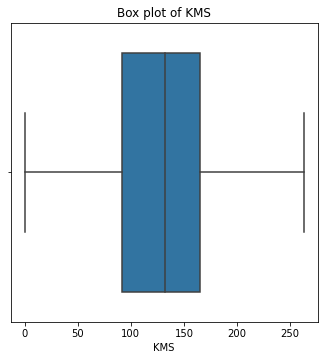

In [7]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['KMS']) 
g.set_title('Box plot of KMS')

Text(0.5, 1.0, 'Time series of KMS Iván')

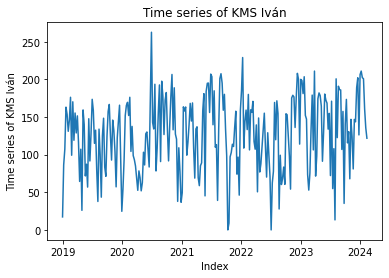

In [8]:
g = plt.plot(df['KMS'])
plt.xlabel('Index') 
plt.ylabel('Time series of KMS Iván') 
plt.title(label='Time series of KMS Iván') 

In [9]:
indice=df['Fecha']
KMSdf =pd.DataFrame(df['KMS'].values,index=indice)


In [10]:
KMSdf.head(10)
type(KMSdf)

pandas.core.frame.DataFrame

In [11]:
KMSdf

,0
Fecha,
2018-12-31,17.3
2019-01-07,86.4
2019-01-14,107.3
2019-01-21,163.1
2019-01-28,153.5
...,...
2024-01-15,202.2
2024-01-22,200.9
2024-01-29,160.7


<h2 style="color: #e67e22; text-align: left;">Función de Autocorrelación</h2>

**Simple**

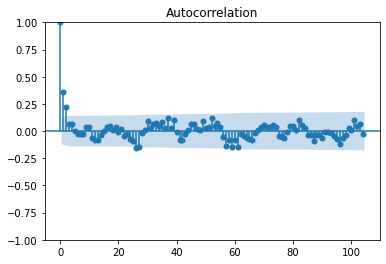

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(KMSdf,lags=104)
plt.show()

**Parcial**

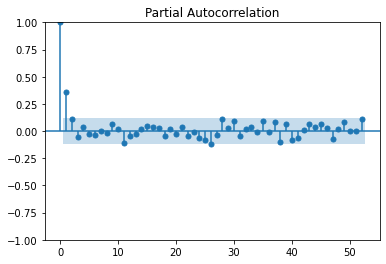

In [13]:
plot_pacf(KMSdf,lags=52,method='ldbiased')
plt.show()

En ambos casos de nos indica que al haber al menor una autocorrelación diferente de cero, se puede decir que las variables del proceso no son independientes.

<h2 style="color: #e67e22; text-align: left;">Periodograma</h2>

16
0.05970149253731343
16.75


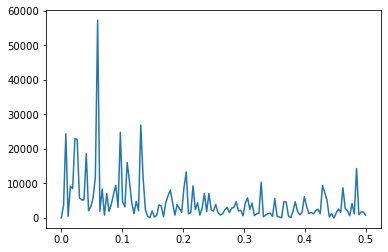

In [14]:
f, Pxx_den=sp.signal.periodogram(df['KMS'])
plt.plot(f, Pxx_den)
#plt.axvline(x=1/0.9,color='red')
max_index_value = np.argmax(Pxx_den, axis=0)
print(max_index_value)
frecuencia_max=f[max_index_value]
print(frecuencia_max)
print(1/frecuencia_max)

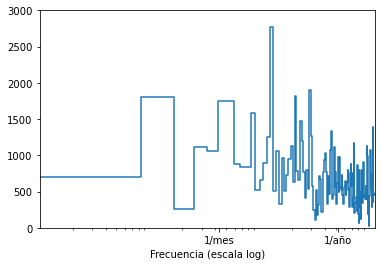

In [15]:
fft = tf.signal.rfft(df['KMS'])

# Número de muestras en la serie
n_samples = len(df['KMS'])

# Frecuencia de muestreo (muestras por semana)
samples_per_month = 4.345  # Si la serie es semanal

# Número total de semanas en la serie
weeks_per_dataset = n_samples / samples_per_month

# Frecuencia en semanas
f_per_week = np.arange(0, len(fft))

# Frecuencia en años (semanas por año aproximadamente)
weeks_per_year = 52.17891428571429
f_per_year = f_per_week / (weeks_per_dataset / weeks_per_year)

# Gráfico
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 3000)
plt.xlim([0.1, max(f_per_year)])
plt.xticks([52.17891428571429,4.345], labels=['1/año', '1/mes'])
plt.xlabel('Frecuencia (escala log)')
plt.show()

Es importante señalar que dependiendo la semana del mes, parece haber un valor medio distinto dependiendo del mes. También parecer haber un comportamineto estacional de forma anual, es decir, el valor medio de la semana depende del mes del año. 
Por lo tanto, se van a considerar solo dos componentes, una para que tenga encuenta la semana del mes y otro para que tenga en cuenta que el comportamiento anual, es decir, para que tenga en cuenta que al principio del año los Kms que el atleta Iván recorre es menor y que a mitad de año la cantidad de kilómetros recorrido es más alto, mientras que a final de año vuelve a disminuir la cantidad de Kilómetros recorridos,patrón que se repite año a año.

In [16]:
date_time=df['Fecha']
type(date_time)


pandas.core.series.Series

In [17]:
date_time.map(pd.Timestamp.timestamp) ###Convierte las fechas a float 

DATE
2018-12-31    1.546214e+09
2019-01-07    1.546819e+09
2019-01-14    1.547424e+09
2019-01-21    1.548029e+09
2019-01-28    1.548634e+09
                  ...     
2024-01-15    1.705277e+09
2024-01-22    1.705882e+09
2024-01-29    1.706486e+09
2024-02-05    1.707091e+09
2024-02-12    1.707696e+09
Name: Fecha, Length: 268, dtype: float64

<h2 style="color: #e67e22; text-align: left;">Incorporando la componente estacional</h2>

#### Convertir las fechas en valores numéricos

Note que el tiempo va a ser convertido a segundos, por lo tanto debemos escribir los ciclos a segundos.

In [18]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s

DATE
2018-12-31    1.546214e+09
2019-01-07    1.546819e+09
2019-01-14    1.547424e+09
2019-01-21    1.548029e+09
2019-01-28    1.548634e+09
                  ...     
2024-01-15    1.705277e+09
2024-01-22    1.705882e+09
2024-01-29    1.706486e+09
2024-02-05    1.707091e+09
2024-02-12    1.707696e+09
Name: Fecha, Length: 268, dtype: float64

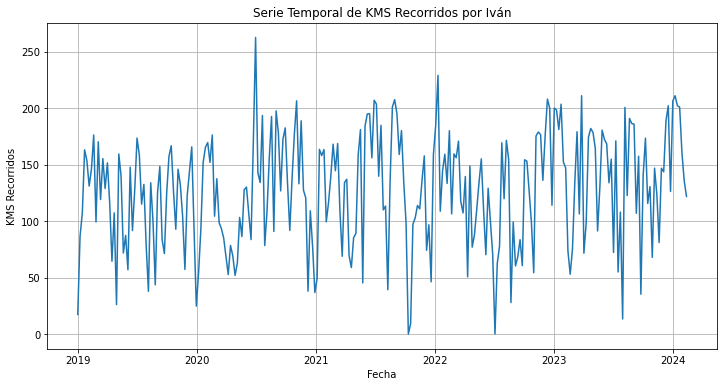

In [19]:
# Periodos
anio = 365.25 * 24 * 60 * 60  # segundos en un año
mes = 30.44 * 24 * 60 * 60  # Segundos en un mes promedio

# Componentes estacionales mensuales
df['Month sin'] = np.sin(timestamp_s * (2 * np.pi / mes))
df['Month cos'] = np.cos(timestamp_s * (2 * np.pi / mes))

# Componentes estacionales anuales
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / anio))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / anio))

# Graficar la serie temporal original
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['KMS'])
plt.xlabel('Fecha')
plt.ylabel('KMS Recorridos')
plt.title('Serie Temporal de KMS Recorridos por Iván')
plt.grid(True)
plt.show()

# Puedes proceder a ajustar un modelo de regresión o cualquier otro modelo de serie temporal
# que tenga en cuenta estas nuevas características estacionales.

Text(0.5, 1.0, 'Time of year signal')

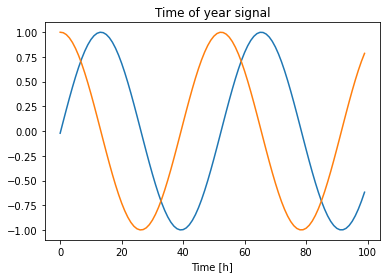

In [20]:
plt.plot(np.array(df['Year sin'])[:100])
plt.plot(np.array(df['Year cos'])[:100])
plt.xlabel('Time [h]')
plt.title('Time of year signal')

Text(0.5, 1.0, 'Time of month signal')

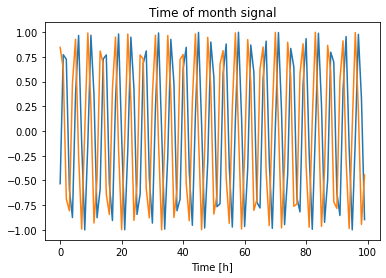

In [21]:
plt.plot(np.array(df['Month sin'])[:100])
plt.plot(np.array(df['Month cos'])[:100])
plt.xlabel('Time [h]')
plt.title('Time of month signal')

In [22]:
df.columns

Index(['KMS', 'Fecha', 'MES', 'DIA', 'AÑO', 'Month sin', 'Month cos',
       'Year sin', 'Year cos'],
      dtype='object')

## Creación alternativa de covariables

In [23]:
indice=df['Fecha']
PRESdf_alt =pd.DataFrame(df[['KMS','Month sin', 'Month cos', 'Year sin','Year cos','Fecha']])


In [24]:
PRESdf_alt

,KMS,Month sin,Month cos,Year sin,Year cos,Fecha
DATE,,,,,,
2018-12-31,17.3,-0.532407,0.846489,-0.021501,0.999769,2018-12-31
2019-01-07,86.4,0.772929,0.634493,0.098753,0.995112,2019-01-07
2019-01-14,107.3,0.726534,-0.687131,0.217577,0.976043,2019-01-14
2019-01-21,163.1,-0.590454,-0.807071,0.333249,0.942839,2019-01-21
2019-01-28,153.5,-0.874831,0.484428,0.444096,0.895979,2019-01-28
...,...,...,...,...,...,...
2024-01-15,202.2,0.636087,-0.771617,0.230151,0.973155,2024-01-15
2024-01-22,200.9,-0.685630,-0.727950,0.345386,0.938461,2024-01-22
2024-01-29,160.7,-0.808288,0.588787,0.455618,0.890175,2024-01-29


In [25]:
indice

DATE
2018-12-31   2018-12-31
2019-01-07   2019-01-07
2019-01-14   2019-01-14
2019-01-21   2019-01-21
2019-01-28   2019-01-28
                ...    
2024-01-15   2024-01-15
2024-01-22   2024-01-22
2024-01-29   2024-01-29
2024-02-05   2024-02-05
2024-02-12   2024-02-12
Name: Fecha, Length: 268, dtype: datetime64[ns]

In [26]:
PRES_alt_df = PRESdf_alt.set_index('Fecha')

In [27]:
PRES_alt_df

,KMS,Month sin,Month cos,Year sin,Year cos
Fecha,,,,,
2018-12-31,17.3,-0.532407,0.846489,-0.021501,0.999769
2019-01-07,86.4,0.772929,0.634493,0.098753,0.995112
2019-01-14,107.3,0.726534,-0.687131,0.217577,0.976043
2019-01-21,163.1,-0.590454,-0.807071,0.333249,0.942839
2019-01-28,153.5,-0.874831,0.484428,0.444096,0.895979
...,...,...,...,...,...
2024-01-15,202.2,0.636087,-0.771617,0.230151,0.973155
2024-01-22,200.9,-0.685630,-0.727950,0.345386,0.938461
2024-01-29,160.7,-0.808288,0.588787,0.455618,0.890175


<h2 style="color: #e67e22; text-align: left;">Entrenamiento Validacion y Prueba</h2> 

In [28]:
column_indices = {name: i for i, name in enumerate(PRES_alt_df.columns)}

n = len(PRES_alt_df)
train_dfPRES = PRES_alt_df[0:int(n*0.7)]
val_dfPRES = PRES_alt_df[int(n*0.7):int(n*0.8)]
test_dfPRES = PRES_alt_df[int(n*0.8):]

num_features = PRES_alt_df.shape[1]
num_features

5

In [29]:
train_dfPRES

,KMS,Month sin,Month cos,Year sin,Year cos
Fecha,,,,,
2018-12-31,17.300,-0.532407,0.846489,-0.021501,0.999769
2019-01-07,86.400,0.772929,0.634493,0.098753,0.995112
2019-01-14,107.300,0.726534,-0.687131,0.217577,0.976043
2019-01-21,163.100,-0.590454,-0.807071,0.333249,0.942839
2019-01-28,153.500,-0.874831,0.484428,0.444096,0.895979
...,...,...,...,...,...
2022-06-27,70.400,-0.996421,0.084528,0.096613,-0.995322
2022-07-04,0.001,-0.041271,0.999148,-0.023651,-0.999720
2022-07-11,62.400,0.986056,0.166416,-0.143572,-0.989640


In [30]:
val_dfPRES

,KMS,Month sin,Month cos,Year sin,Year cos
Fecha,,,,,
2022-08-01,119.8,-0.518357,0.855165,-0.484089,-0.875019
2022-08-08,171.5,0.783300,0.621644,-0.585696,-0.810531
2022-08-15,154.7,0.715089,-0.699034,-0.678820,-0.734304
2022-08-22,27.8,-0.603700,-0.797212,-0.762114,-0.647443
2022-08-29,99.2,-0.866713,0.498808,-0.834370,-0.551205
2022-09-05,60.3,0.386018,0.922491,-0.894542,-0.446983
2022-09-12,68.3,0.963664,-0.267117,-0.941759,-0.336289
2022-09-19,83.5,-0.143986,-0.989580,-0.975336,-0.220724
2022-09-26,60.5,-0.999827,0.018576,-0.994788,-0.101962


In [31]:
test_dfPRES

,KMS,Month sin,Month cos,Year sin,Year cos
Fecha,,,,,
2023-02-06,147.2,0.694592,0.719404,0.576948,0.816781
2023-02-13,73.4,0.800935,-0.598752,0.670887,0.741560
2023-02-20,52.9,-0.493431,-0.869785,0.755109,0.655599
2023-02-27,75.5,-0.924864,0.380298,0.828396,0.560143
2023-03-06,133.5,0.261144,0.965300,0.889685,0.456575
2023-03-13,179.1,0.990452,-0.137856,0.938089,0.346394
2023-03-20,106.3,-0.012384,-0.999923,0.972907,0.231197
2023-03-27,211.0,-0.993563,-0.113283,0.993635,0.112651
2023-04-03,71.5,-0.237157,0.971471,0.999972,-0.007526


<h2 style="color: #e67e22; text-align: left;">Normalización</h2> 

In [32]:
train_mean = train_dfPRES.mean()
train_std = train_dfPRES.std()

train_df = (train_dfPRES - train_mean) / train_std
val_df = (val_dfPRES - train_mean) / train_std
test_df = (test_dfPRES - train_mean) / train_std

In [33]:
print(train_df)

                 KMS  Month sin  Month cos  Year sin  Year cos
Fecha                                                         
2018-12-31 -2.175856  -0.750803   1.193928 -0.152055  1.417556
2019-01-07 -0.740463   1.090209   0.894912  0.020618  1.411054
2019-01-14 -0.306314   1.024775  -0.969211  0.191237  1.384430
2019-01-21  0.852802  -0.832671  -1.138385  0.357332  1.338069
2019-01-28  0.653384  -1.233750   0.683249  0.516496  1.272642
...              ...        ...        ...       ...       ...
2022-06-27 -1.072826  -1.405237   0.119198  0.017545 -1.368049
2022-07-04 -2.535202  -0.058117   1.409250 -0.155141 -1.374190
2022-07-11 -1.239008   1.390798   0.234699 -0.327336 -1.360116
2022-07-18 -0.919108   0.407585  -1.350352 -0.496546 -1.326029
2022-07-25  0.981593  -1.288273  -0.573898 -0.660319 -1.272425

[187 rows x 5 columns]


Note que se podría analizar que pasa cuando se tiene como variables predictoras solo a estas variables determinísticas, o como viene enseguida sólo con variables rezagadas. Finalmente, se pueden unir características de ambas y formar predictoras de las dos naturalezas.

<h2 style="color: #e67e22; text-align: left;"> Creación de variables rezagadas</h2> 

Note que vamos a enfocarnos en la predicción 1 paso adelante.

In [34]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = PRES_alt_df.copy()
print(df1)

              KMS  Month sin  Month cos  Year sin  Year cos
Fecha                                                      
2018-12-31   17.3  -0.532407   0.846489 -0.021501  0.999769
2019-01-07   86.4   0.772929   0.634493  0.098753  0.995112
2019-01-14  107.3   0.726534  -0.687131  0.217577  0.976043
2019-01-21  163.1  -0.590454  -0.807071  0.333249  0.942839
2019-01-28  153.5  -0.874831   0.484428  0.444096  0.895979
...           ...        ...        ...       ...       ...
2024-01-15  202.2   0.636087  -0.771617  0.230151  0.973155
2024-01-22  200.9  -0.685630  -0.727950  0.345386  0.938461
2024-01-29  160.7  -0.808288   0.588787  0.455618  0.890175
2024-02-05  135.7   0.482622   0.875829  0.559252  0.828997
2024-02-12  121.8   0.929503  -0.368815  0.654787  0.755814

[268 rows x 5 columns]


In [35]:
df1=df1[['Month sin','Month cos','Year sin','Year cos']]

In [36]:
df1

,Month sin,Month cos,Year sin,Year cos
Fecha,,,,
2018-12-31,-0.532407,0.846489,-0.021501,0.999769
2019-01-07,0.772929,0.634493,0.098753,0.995112
2019-01-14,0.726534,-0.687131,0.217577,0.976043
2019-01-21,-0.590454,-0.807071,0.333249,0.942839
2019-01-28,-0.874831,0.484428,0.444096,0.895979
...,...,...,...,...
2024-01-15,0.636087,-0.771617,0.230151,0.973155
2024-01-22,-0.685630,-0.727950,0.345386,0.938461
2024-01-29,-0.808288,0.588787,0.455618,0.890175


In [37]:
for i in range(2, 0, -1):
    df1['t-' + str(i)] = PRES_alt_df['KMS'].shift(i)

# Mostrar el resultado
print(df1)


            Month sin  Month cos  Year sin  Year cos    t-2    t-1
Fecha                                                             
2018-12-31  -0.532407   0.846489 -0.021501  0.999769    NaN    NaN
2019-01-07   0.772929   0.634493  0.098753  0.995112    NaN   17.3
2019-01-14   0.726534  -0.687131  0.217577  0.976043   17.3   86.4
2019-01-21  -0.590454  -0.807071  0.333249  0.942839   86.4  107.3
2019-01-28  -0.874831   0.484428  0.444096  0.895979  107.3  163.1
...               ...        ...       ...       ...    ...    ...
2024-01-15   0.636087  -0.771617  0.230151  0.973155  206.3  211.0
2024-01-22  -0.685630  -0.727950  0.345386  0.938461  211.0  202.2
2024-01-29  -0.808288   0.588787  0.455618  0.890175  202.2  200.9
2024-02-05   0.482622   0.875829  0.559252  0.828997  200.9  160.7
2024-02-12   0.929503  -0.368815  0.654787  0.755814  160.7  135.7

[268 rows x 6 columns]


In [38]:
# Create column t
df1['t'] = PRES_alt_df['KMS']
print(df1.head(8))

            Month sin  Month cos  Year sin  Year cos    t-2    t-1      t
Fecha                                                                    
2018-12-31  -0.532407   0.846489 -0.021501  0.999769    NaN    NaN   17.3
2019-01-07   0.772929   0.634493  0.098753  0.995112    NaN   17.3   86.4
2019-01-14   0.726534  -0.687131  0.217577  0.976043   17.3   86.4  107.3
2019-01-21  -0.590454  -0.807071  0.333249  0.942839   86.4  107.3  163.1
2019-01-28  -0.874831   0.484428  0.444096  0.895979  107.3  163.1  153.5
2019-02-04   0.370733   0.928739  0.548511  0.836144  163.1  153.5  131.0
2019-02-11   0.967943  -0.251168  0.644981  0.764198  153.5  131.0  146.1
2019-02-18  -0.127626  -0.991822  0.732111  0.681185  131.0  146.1  176.2


In [39]:
# Create a new subsetted dataframe, removing Nans from first 7 rows
df1_PRES = df1[2:]
print(df1_PRES.head(2))
df1_PRES.shape

            Month sin  Month cos  Year sin  Year cos   t-2    t-1      t
Fecha                                                                   
2019-01-14   0.726534  -0.687131  0.217577  0.976043  17.3   86.4  107.3
2019-01-21  -0.590454  -0.807071  0.333249  0.942839  86.4  107.3  163.1


(266, 7)

<h2 style="color: #e67e22; text-align: left;">  Dividir los datos en repuestas y Covariables, entrenamiento, validación y prueba.</h2> 

In [40]:
# Split data

PRESsplit = df1_PRES.values
# split into lagged variables and original time series
X1= PRESsplit[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 =PRESsplit[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [41]:
print(X1)
print(y1)

[[  0.7265337   -0.68713084   0.21757661   0.97604325  17.3
   86.4       ]
 [ -0.5904539   -0.80707137   0.33324939   0.94283872  86.4
  107.3       ]
 [ -0.87483088   0.48442845   0.4440958    0.89597931 107.3
  163.1       ]
 ...
 [ -0.80828842   0.58878675   0.45561828   0.89017525 202.2
  200.9       ]
 [  0.48262166   0.87582894   0.55925232   0.82899749 200.9
  160.7       ]
 [  0.92950268  -0.36881535   0.65478686   0.75581358 160.7
  135.7       ]]
[1.073e+02 1.631e+02 1.535e+02 1.310e+02 1.461e+02 1.762e+02 9.920e+01
 1.702e+02 1.191e+02 1.553e+02 1.288e+02 1.515e+02 1.161e+02 6.440e+01
 1.072e+02 2.600e+01 1.594e+02 1.398e+02 7.170e+01 8.730e+01 5.690e+01
 1.477e+02 9.160e+01 1.282e+02 1.735e+02 1.586e+02 1.150e+02 1.325e+02
 7.870e+01 3.780e+01 1.339e+02 9.980e+01 4.350e+01 1.254e+02 1.484e+02
 8.360e+01 7.120e+01 1.246e+02 1.573e+02 1.667e+02 1.261e+02 9.280e+01
 1.459e+02 1.321e+02 1.041e+02 5.720e+01 1.225e+02 1.440e+02 1.657e+02
 9.300e+01 2.470e+01 5.430e+01 9.320e+01 

Primero dividiremos nuestro conjunto de datos en entrenamiento(90%) y prueba(10%), luego el entrenamiento será dividido en entrenamiento(80% del 90%) y validación(20% del 90%).

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [43]:
X_train_full, X_test, y_train_full, y_test=train_test_split(X1,y1,test_size=0.196, train_size=0.804,shuffle=False)

In [44]:
print(X_train_full.shape)
print(X_test.shape)

print(y_train_full.shape)
print(y_test.shape)

(213, 6)
(53, 6)
(213,)
(53,)


In [45]:
X_train, X_val, y_train, y_val=train_test_split(X_train_full,y_train_full,test_size=0.125, train_size=0.875,shuffle=False)

In [46]:
print(X_train.shape)
print(X_val.shape)

print(y_train.shape)
print(y_val.shape)

(186, 6)
(27, 6)
(186,)
(27,)


Vamos a chequear que los valores quedaron consecutivos

In [47]:
y_train

array([1.073e+02, 1.631e+02, 1.535e+02, 1.310e+02, 1.461e+02, 1.762e+02,
       9.920e+01, 1.702e+02, 1.191e+02, 1.553e+02, 1.288e+02, 1.515e+02,
       1.161e+02, 6.440e+01, 1.072e+02, 2.600e+01, 1.594e+02, 1.398e+02,
       7.170e+01, 8.730e+01, 5.690e+01, 1.477e+02, 9.160e+01, 1.282e+02,
       1.735e+02, 1.586e+02, 1.150e+02, 1.325e+02, 7.870e+01, 3.780e+01,
       1.339e+02, 9.980e+01, 4.350e+01, 1.254e+02, 1.484e+02, 8.360e+01,
       7.120e+01, 1.246e+02, 1.573e+02, 1.667e+02, 1.261e+02, 9.280e+01,
       1.459e+02, 1.321e+02, 1.041e+02, 5.720e+01, 1.225e+02, 1.440e+02,
       1.657e+02, 9.300e+01, 2.470e+01, 5.430e+01, 9.320e+01, 1.519e+02,
       1.654e+02, 1.695e+02, 1.520e+02, 1.762e+02, 1.043e+02, 1.375e+02,
       9.870e+01, 9.330e+01, 8.500e+01, 6.900e+01, 5.260e+01, 7.840e+01,
       6.920e+01, 5.190e+01, 6.280e+01, 1.032e+02, 8.630e+01, 1.277e+02,
       1.301e+02, 1.067e+02, 8.360e+01, 1.691e+02, 2.626e+02, 1.429e+02,
       1.341e+02, 1.935e+02, 7.830e+01, 1.083e+02, 

In [48]:
y_val

array([171.5, 154.7,  27.8,  99.2,  60.3,  68.3,  83.5,  60.5, 154.3,
       153. , 126.3,  98.1,  54.2, 175.3, 178.9, 176.6, 136.1, 175.4,
       208. , 200. , 114. , 200. , 198.4, 181.1, 203.5, 152.2, 147.2])

In [49]:
y_test

array([ 73.4,  52.9,  75.5, 133.5, 179.1, 106.3, 211. ,  71.5,  98. ,
       174.3, 182. , 178.5, 164.4,  91.2, 129.9, 180.5, 172.4, 168.4,
       133.9, 154.8,  72.2, 171. ,  54.9, 107.9,  13.3, 200.7, 122.6,
       190.9, 186.3, 185.9, 106.9, 157.4,  35.2, 140.6, 173.4, 115.6,
       130.5,  67.9, 146.9, 123.5,  81. , 146.8, 143.6, 188.8, 202.1,
       126.2, 206.3, 211. , 202.2, 200.9, 160.7, 135.7, 121.8])

<h2 style="color: #e67e22; text-align: left;">  Normalización de las covariables únicamente</h2> 

Note que para éste caso se elige la normalización MinMaxScaler, es decir, transforma todas las variables a que tomen valores entre 0 y 1. Vale la pena decir que esta transformación es basada en el conjuto de entrenamiento, y aplicada con esos parámetros(Min y Max), a los tres conjuntos entrenamiento , validación y prueba.

In [50]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [51]:
X_train

array([[0.86328969, 0.15644165, 0.60875976, 0.98831242, 0.06587611,
        0.32901496],
       [0.20477766, 0.09646704, 0.66662709, 0.97170292, 0.32901496,
        0.40860399],
       [0.06258523, 0.74226373, 0.72207994, 0.948263  , 0.40860399,
        0.62109528],
       ...,
       [0.64447999, 0.02132163, 0.36913616, 0.01725432, 0.        ,
        0.23762086],
       [0.04325539, 0.29658605, 0.31207767, 0.03645883, 0.23762086,
        0.29626541],
       [0.24082733, 0.92764523, 0.25773955, 0.0623778 , 0.29626541,
        0.64470543]])

In [52]:
y_train

array([1.073e+02, 1.631e+02, 1.535e+02, 1.310e+02, 1.461e+02, 1.762e+02,
       9.920e+01, 1.702e+02, 1.191e+02, 1.553e+02, 1.288e+02, 1.515e+02,
       1.161e+02, 6.440e+01, 1.072e+02, 2.600e+01, 1.594e+02, 1.398e+02,
       7.170e+01, 8.730e+01, 5.690e+01, 1.477e+02, 9.160e+01, 1.282e+02,
       1.735e+02, 1.586e+02, 1.150e+02, 1.325e+02, 7.870e+01, 3.780e+01,
       1.339e+02, 9.980e+01, 4.350e+01, 1.254e+02, 1.484e+02, 8.360e+01,
       7.120e+01, 1.246e+02, 1.573e+02, 1.667e+02, 1.261e+02, 9.280e+01,
       1.459e+02, 1.321e+02, 1.041e+02, 5.720e+01, 1.225e+02, 1.440e+02,
       1.657e+02, 9.300e+01, 2.470e+01, 5.430e+01, 9.320e+01, 1.519e+02,
       1.654e+02, 1.695e+02, 1.520e+02, 1.762e+02, 1.043e+02, 1.375e+02,
       9.870e+01, 9.330e+01, 8.500e+01, 6.900e+01, 5.260e+01, 7.840e+01,
       6.920e+01, 5.190e+01, 6.280e+01, 1.032e+02, 8.630e+01, 1.277e+02,
       1.301e+02, 1.067e+02, 8.360e+01, 1.691e+02, 2.626e+02, 1.429e+02,
       1.341e+02, 1.935e+02, 7.830e+01, 1.083e+02, 

In [53]:
X_test

array([[ 9.00491199e-01,  2.00634387e-01,  8.35535947e-01,
         8.71019706e-01,  5.79587127e-01,  5.60546689e-01],
       [ 2.53290311e-01,  6.51080618e-02,  8.77669785e-01,
         8.28020502e-01,  5.60546689e-01,  2.79509823e-01],
       [ 3.75680565e-02,  6.90194935e-01,  9.14332676e-01,
         7.80271796e-01,  2.79509823e-01,  2.01444027e-01],
       [ 6.30588587e-01,  9.82716793e-01,  9.44993641e-01,
         7.28465118e-01,  2.01444027e-01,  2.87506807e-01],
       [ 9.95252658e-01,  4.31099107e-01,  9.69208626e-01,
         6.73350771e-01,  2.87506807e-01,  5.08375889e-01],
       [ 4.93820405e-01,  3.40867595e-05,  9.86626932e-01,
         6.15726962e-01,  5.08375889e-01,  6.82024684e-01],
       [ 3.21764121e-03,  4.43386369e-01,  9.96996294e-01,
         5.56428240e-01,  6.82024684e-01,  4.04795906e-01],
       [ 3.81431114e-01,  9.85802836e-01,  1.00016654e+00,
         4.96313414e-01,  4.04795906e-01,  8.03502679e-01],
       [ 9.67025195e-01,  6.78682758e-01,  9.960

In [54]:
y_test

array([ 73.4,  52.9,  75.5, 133.5, 179.1, 106.3, 211. ,  71.5,  98. ,
       174.3, 182. , 178.5, 164.4,  91.2, 129.9, 180.5, 172.4, 168.4,
       133.9, 154.8,  72.2, 171. ,  54.9, 107.9,  13.3, 200.7, 122.6,
       190.9, 186.3, 185.9, 106.9, 157.4,  35.2, 140.6, 173.4, 115.6,
       130.5,  67.9, 146.9, 123.5,  81. , 146.8, 143.6, 188.8, 202.1,
       126.2, 206.3, 211. , 202.2, 200.9, 160.7, 135.7, 121.8])

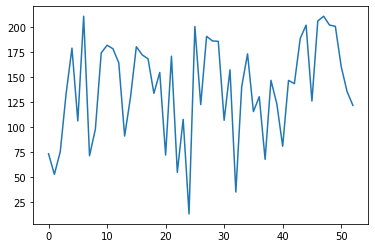

In [55]:
plt.plot(y_test)

In [56]:
X_val

array([[ 8.91673686e-01,  8.10876336e-01,  2.06908770e-01,
         9.46358753e-02,  6.44705425e-01,  4.56205088e-01],
       [ 8.57566979e-01,  1.50489720e-01,  1.60321494e-01,
         1.32765858e-01,  4.56205088e-01,  6.53083218e-01],
       [ 1.98154454e-01,  1.01397267e-01,  1.18652435e-01,
         1.76215526e-01,  6.53083218e-01,  5.89107346e-01],
       [ 6.66444685e-02,  7.49453924e-01,  8.25050752e-02,
         2.24355608e-01,  5.89107346e-01,  1.05861028e-01],
       [ 6.93027216e-01,  9.61310953e-01,  5.24029266e-02,
         2.76488904e-01,  1.05861028e-01,  3.77758483e-01],
       [ 9.81858204e-01,  3.66463871e-01,  2.87819509e-02,
         3.31860382e-01,  3.77758483e-01,  2.29623875e-01],
       [ 4.28017653e-01,  5.20627381e-03,  1.19842443e-02,
         3.89668112e-01,  2.29623875e-01,  2.60088576e-01],
       [ 8.52118157e-05,  5.09320640e-01,  2.25308350e-03,
         4.49074879e-01,  2.60088576e-01,  3.17971508e-01],
       [ 4.46447132e-01,  9.97190565e-01, -2.705

In [57]:
y_val

array([171.5, 154.7,  27.8,  99.2,  60.3,  68.3,  83.5,  60.5, 154.3,
       153. , 126.3,  98.1,  54.2, 175.3, 178.9, 176.6, 136.1, 175.4,
       208. , 200. , 114. , 200. , 198.4, 181.1, 203.5, 152.2, 147.2])

In [58]:
import tensorflow.keras as keras

<h2 style="color: #e67e22; text-align: left;">   Red Nueronal con una sola Capa oculta(MLP)</h2> 

La siguiente es la configuración de una red neuronal con una sola capa oculta

In [59]:
model=keras.models.Sequential([keras.layers.Dense(64,activation="relu",input_shape=X_train.shape[1:]),keras.layers.Dense(1)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(loss="mean_squared_error",optimizer="adam")
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val)) #está tomando por defecto 32 del tamaño del lote, que sucede si es mayor o menor? Se puede modificar usando  el argumento batch_size= 

Epoch 1/50
6/6 [==============================] - 3s 124ms/step - loss: 17291.6523 - val_loss: 22003.7148
Epoch 2/50
6/6 [==============================] - 0s 27ms/step - loss: 17250.8379 - val_loss: 21954.4160
Epoch 3/50
6/6 [==============================] - 0s 24ms/step - loss: 17209.5059 - val_loss: 21903.7539
Epoch 4/50
6/6 [==============================] - 0s 23ms/step - loss: 17166.5508 - val_loss: 21850.8301
Epoch 5/50
6/6 [==============================] - 0s 26ms/step - loss: 17120.2188 - val_loss: 21795.2773
Epoch 6/50
6/6 [==============================] - 0s 24ms/step - loss: 17070.8828 - val_loss: 21736.4219
Epoch 7/50
6/6 [==============================] - 0s 22ms/step - loss: 17018.9199 - val_loss: 21672.5762
Epoch 8/50
6/6 [==============================] - 0s 22ms/step - loss: 16963.2090 - val_loss: 21602.6074
Epoch 9/50
6/6 [==============================] - 0s 23ms/step - loss: 16901.4336 - val_loss: 21525.5586
Epoch 10/50
6/6 [==============================] - 0s 

<AxesSubplot:>

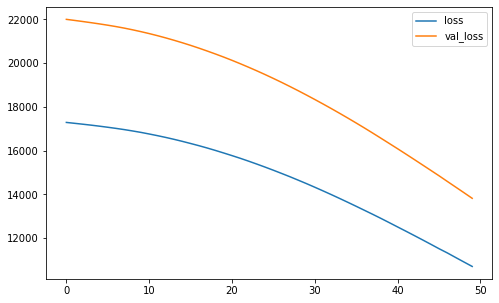

In [61]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [62]:
mse_test=model.evaluate(X_test,y_test)


2/2 [==============================] - 0s 14ms/step - loss: 13689.1416


In [63]:
print(mse_test)

13689.1416015625


In [64]:
ypred=model.predict(X_test)
print(ypred)

2/2 [==============================] - 0s 16ms/step
[[38.846004]
 [30.35343 ]
 [30.844152]
 [37.660255]
 [38.210083]
 [33.84218 ]
 [32.52695 ]
 [40.4691  ]
 [40.725834]
 [29.856443]
 [28.912937]
 [36.85247 ]
 [41.456512]
 [35.609497]
 [25.922205]
 [27.284533]
 [36.50103 ]
 [35.904346]
 [27.569448]
 [25.25115 ]
 [31.568964]
 [31.519741]
 [25.060076]
 [20.101795]
 [23.539885]
 [27.457705]
 [26.099028]
 [22.936602]
 [25.348059]
 [34.64009 ]
 [33.88208 ]
 [24.27165 ]
 [22.730778]
 [27.96147 ]
 [30.799791]
 [29.242643]
 [24.56527 ]
 [29.134995]
 [34.00585 ]
 [31.362667]
 [27.005125]
 [27.73522 ]
 [36.41052 ]
 [38.648228]
 [33.218452]
 [34.08265 ]
 [39.56646 ]
 [43.46377 ]
 [40.346214]
 [35.72655 ]
 [40.609264]
 [45.529087]
 [40.165283]]


Text(0.5, 0, 'Index')

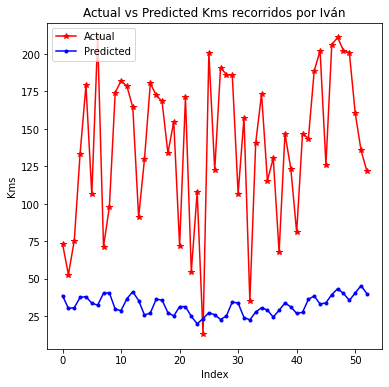

In [65]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='r')
plt.plot(range(ypred.size), ypred, linestyle='-', marker='.', color='b') 
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Kms recorridos por Iván')
plt.ylabel('Kms')
plt.xlabel('Index')

<h2 style="color: #e67e22; text-align: left;"> Modelos mas complejos</h2>  

In [66]:
input_layer = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(32,activation="linear")(input_layer)
hidden2 = keras.layers.Dense(16,activation="linear")(hidden1)
hidden3 = keras.layers.Dense(16,activation="linear")(hidden2)
#dropout_layer = keras.layers.Dropout(0.2)(hidden3)
#output_layer = keras.layers.Dense(1, activation='linear')(dropout_layer)
output_layer = keras.layers.Dense(1, activation='linear')(hidden3)

In [67]:
ts_model=keras.Model(inputs=[input_layer],outputs=[output_layer])
ts_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_2 (Dense)             (None, 32)                224       
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________


In [68]:
print("Input shape:", X_train.shape)
print("Target shape:", y_train.shape)

Input shape: (186, 6)
Target shape: (186,)


In [69]:
type(X_train)

numpy.ndarray

In [70]:
ts_model.compile(loss="mean_squared_error",optimizer="adam")
history=ts_model.fit(X_train,y_train,epochs=50,batch_size=16,validation_data=(X_val,y_val))

Epoch 1/50
12/12 [==============================] - 3s 53ms/step - loss: 17191.7207 - val_loss: 21731.3652
Epoch 2/50
12/12 [==============================] - 0s 14ms/step - loss: 16823.3301 - val_loss: 21225.8301
Epoch 3/50
12/12 [==============================] - 0s 14ms/step - loss: 16341.4922 - val_loss: 20514.7461
Epoch 4/50
12/12 [==============================] - 0s 14ms/step - loss: 15623.1992 - val_loss: 19445.1016
Epoch 5/50
12/12 [==============================] - 0s 13ms/step - loss: 14579.3330 - val_loss: 17836.1484
Epoch 6/50
12/12 [==============================] - 0s 13ms/step - loss: 13052.6025 - val_loss: 15538.5391
Epoch 7/50
12/12 [==============================] - 0s 13ms/step - loss: 10870.9688 - val_loss: 12487.5117
Epoch 8/50
12/12 [==============================] - 0s 14ms/step - loss: 8328.7725 - val_loss: 8767.2900
Epoch 9/50
12/12 [==============================] - 0s 15ms/step - loss: 5627.0625 - val_loss: 5170.9116
Epoch 10/50
12/12 [======================

<AxesSubplot:>

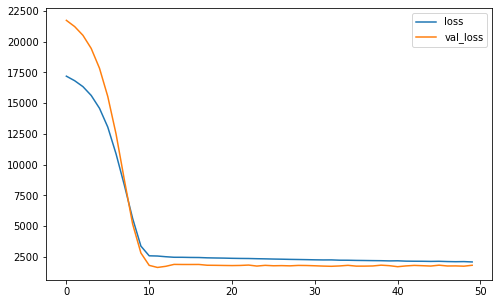

In [71]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [72]:
mse_test=ts_model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 2364.3738


In [73]:
print(mse_test)

2364.373779296875


In [74]:
preds_ts_model=ts_model.predict(X_test)
print(preds_ts_model)

2/2 [==============================] - 0s 0s/step
[[140.93242 ]
 [109.21824 ]
 [ 98.539825]
 [115.31197 ]
 [128.28923 ]
 [131.85316 ]
 [122.545654]
 [148.88954 ]
 [140.12837 ]
 [104.295   ]
 [117.02599 ]
 [145.1186  ]
 [156.62563 ]
 [141.44984 ]
 [106.8741  ]
 [108.13794 ]
 [141.97543 ]
 [145.87317 ]
 [125.91544 ]
 [115.16649 ]
 [129.4853  ]
 [119.749115]
 [111.68428 ]
 [ 93.68157 ]
 [ 97.01344 ]
 [ 97.80605 ]
 [113.639084]
 [115.32616 ]
 [122.58557 ]
 [150.85503 ]
 [148.84213 ]
 [114.61623 ]
 [109.70325 ]
 [108.136765]
 [117.26338 ]
 [130.33388 ]
 [113.79018 ]
 [119.45653 ]
 [122.25545 ]
 [121.15474 ]
 [115.73523 ]
 [107.39324 ]
 [132.07074 ]
 [143.68652 ]
 [137.3379  ]
 [145.5466  ]
 [147.16402 ]
 [159.66716 ]
 [161.84633 ]
 [149.79024 ]
 [159.13274 ]
 [163.79921 ]
 [143.15033 ]]


Text(0.5, 0, 'Index')

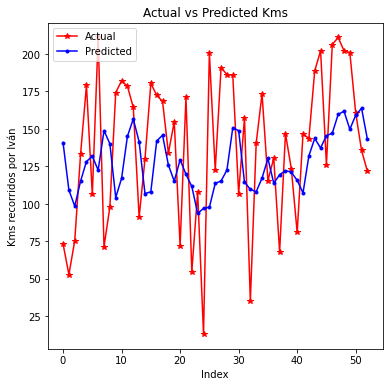

In [75]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='r')
plt.plot(range(preds_ts_model.size), preds_ts_model, linestyle='-', marker='.', color='b') 
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Kms')
plt.ylabel('Kms recorridos por Iván')
plt.xlabel('Index')

<h2 style="color: #e67e22; text-align: left;"> Busqueda de los hiperparámetros</h2>   

In [76]:
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras import layers

In [77]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int("num_units", min_value=32, max_value=64, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"])))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 2)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=32, max_value=64, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(1, activation="linear"))
    learning_rate = hp.Float("lr", min_value=1e-3, max_value=1e-2,step=0.003)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mean_squared_error",
        metrics=["mean_squared_error"]
    )
    return model


build_model(kt.HyperParameters())

In [78]:
tuner_GridSearch_mlp = kt.GridSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=None,
    executions_per_trial=1,
    overwrite=True,
    directory="dirsalida",
    project_name="helloworld",
)

In [79]:
tuner_GridSearch_mlp.search_space_summary()

Search space summary
Default search space size: 6
num_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 32, 'sampling': 'linear'}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.01, 'step': 0.003, 'sampling': 'linear'}


In [80]:
stop_early=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=2)

In [81]:
tuner_GridSearch_mlp.search(X_train,y_train, epochs=20, validation_data=(X_val,y_val),callbacks=[stop_early])

Trial 136 Complete [00h 00m 07s]
val_loss: 1379.7264404296875

Best val_loss So Far: 1366.018798828125
Total elapsed time: 00h 18m 27s

Search: Running Trial #137

Value             |Best Value So Far |Hyperparameter
64                |32                |num_units
relu              |relu              |activation
1                 |1                 |num_layers
64                |64                |units_0
True              |False             |dropout
0.001             |0.004             |lr
32                |None              |units_1

Epoch 1/20
6/6 [==============================] - 4s 167ms/step - loss: 17291.4629 - mean_squared_error: 17291.4629 - val_loss: 21985.0176 - val_mean_squared_error: 21985.0176
Epoch 2/20
6/6 [==============================] - 0s 49ms/step - loss: 17199.1270 - mean_squared_error: 17199.1270 - val_loss: 21875.0234 - val_mean_squared_error: 21875.0234
Epoch 3/20
6/6 [==============================] - 0s 47ms/step - loss: 17097.9219 - mean_squared_error: 17

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 82: invalid continuation byte

In [95]:
# Get the top 2 models.
shape = (7, 64)
initial_value = tf.random.normal(shape=(shape[0], shape[1]))

# Crear la variable con el valor inicial y la forma especificada
variable = tf.Variable(initial_value, shape=shape)

# Verificar la forma de la variable creada
print("Shape de la variable:", variable.shape)

Shape de la variable: (7, 64)


<h2 style="color: #e67e22; text-align: left;"> Los mejores 10 modelos</h2>   



In [96]:
tuner_GridSearch_mlp.results_summary()

Results summary
Results in dirsalida\helloworld
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0034 summary
Hyperparameters:
num_units: 32
activation: relu
num_layers: 2
units_0: 64
dropout: False
lr: 0.004
units_1: 32
Score: 1322.8177490234375

Trial 0020 summary
Hyperparameters:
num_units: 32
activation: relu
num_layers: 2
units_0: 32
dropout: False
lr: 0.007
units_1: 32
Score: 1337.568603515625

Trial 0028 summary
Hyperparameters:
num_units: 32
activation: relu
num_layers: 2
units_0: 32
dropout: True
lr: 0.007
units_1: 32
Score: 1342.03466796875

Trial 0007 summary
Hyperparameters:
num_units: 32
activation: relu
num_layers: 1
units_0: 32
dropout: True
lr: 0.010000000000000002
Score: 1342.50732421875

Trial 0142 summary
Hyperparameters:
num_units: 64
activation: relu
num_layers: 1
units_0: 64
dropout: True
lr: 0.010000000000000002
units_1: 32
Score: 1343.3463134765625

Trial 0036 summary
Hyperparameters:
num_units: 32
activation: relu
num_layers: 2
units_0:

<h2 style="color: #e67e22; text-align: left;"> Ajuste del mejor modelo con el conjunto de entrenamineto y validación</h2>   

- Se configuró una red neuronal con 2 capas ocultas, cada una con 64 unidades.
- La función de activación utilizada es Relu.
- No se aplicó dropout para regularización.
- La tasa de aprendizaje del optimizador se estableció en 0.004.
- La puntuación final del modelo bajo esta configuración de hiperparámetros fue aproximadamente 1322.

In [97]:
x_all = np.concatenate((X_train, X_val))
y_all = np.concatenate((y_train, y_val))

In [98]:
callback=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5)
best_hps_mlp = tuner_GridSearch_mlp.get_best_hyperparameters(2)
model_mlp = build_model(best_hps_mlp[0])
# Fit with the entire dataset.
model_mlp.fit(x_all,y_all, epochs=50,callbacks=[callback])

Epoch 1/50
7/7 [==============================] - 4s 8ms/step - loss: 17830.2461 - mean_squared_error: 17830.2461
Epoch 2/50
7/7 [==============================] - 0s 9ms/step - loss: 17441.3750 - mean_squared_error: 17441.3750
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 16418.0625 - mean_squared_error: 16418.0625
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 13885.6416 - mean_squared_error: 13885.6416
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 9012.1582 - mean_squared_error: 9012.1582
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 3532.0132 - mean_squared_error: 3532.0132
Epoch 7/50
7/7 [==============================] - 0s 10ms/step - loss: 3361.8271 - mean_squared_error: 3361.8271
Epoch 8/50
7/7 [==============================] - 0s 8ms/step - loss: 2536.9438 - mean_squared_error: 2536.9438
Epoch 9/50
7/7 [==============================] - 0s 8ms/step - loss: 2574.7852 - mean_squared_

In [99]:
model_mlp.layers[0].get_weights()[0]

array([[ 0.12371572, -0.1280228 , -0.19180329,  0.41650835,  0.02637871,
         0.05273366,  0.07434419, -0.37205   ,  0.18815263,  0.12054679,
        -0.20731786, -0.12107558,  0.20720826,  0.2580323 ,  0.08746978,
         0.22567727,  0.1279078 , -0.24400118, -0.06791622,  0.12216742,
         0.2987152 , -0.14920676,  0.2568025 ,  0.39565355,  0.1754178 ,
         0.30794406, -0.09768212,  0.16054499, -0.39654297, -0.04557552,
        -0.1230857 , -0.37150353],
       [ 0.28714746,  0.21632864, -0.01170203,  0.29505274,  0.04428234,
         0.01697067, -0.48001602,  0.13260436, -0.14037734, -0.32189435,
        -0.24792708,  0.144299  ,  0.3360288 ,  0.08397264,  0.13084209,
         0.20749684,  0.34674123,  0.36270607, -0.05051268,  0.39048627,
        -0.18206349,  0.12904902,  0.03585727, -0.04838161, -0.26119426,
        -0.66631836,  0.01779178,  0.09403766, -0.27314186, -0.00843714,
         0.38126042, -0.03202182],
       [ 0.41924685, -0.36489835, -0.14397854,  0.3427

In [100]:
print(model_mlp.layers[0].bias.numpy())

[ 0.22702342  0.17172518  0.          0.22232002  0.22623524  0.18335451
  0.38066432  0.18443476  0.230755    0.2293577   0.         -0.02046705
  0.22550312  0.22838989  0.15839905  0.17875394  0.22735506  0.22931024
  0.18318327  0.18758799  0.21460487  0.12347034  0.0720036   0.22568014
  0.21407592  0.0391313   0.          0.10501894  0.          0.21220881
  0.19977476  0.18823415]


In [101]:
X_test.shape

(53, 6)

In [102]:
prediction_test=model_mlp.predict( X_test, verbose=1)

2/2 [==============================] - 0s 0s/step


In [103]:
prediction_test

array([[138.09439 ],
       [106.02384 ],
       [ 89.94095 ],
       [102.914635],
       [123.72695 ],
       [137.23343 ],
       [115.89982 ],
       [146.5676  ],
       [119.46999 ],
       [105.79645 ],
       [124.530556],
       [142.61804 ],
       [147.95815 ],
       [139.45981 ],
       [106.42681 ],
       [111.66569 ],
       [140.68954 ],
       [144.02449 ],
       [135.30415 ],
       [121.689224],
       [131.53415 ],
       [112.8073  ],
       [127.187294],
       [ 96.8176  ],
       [104.40991 ],
       [ 89.33911 ],
       [134.02243 ],
       [125.46667 ],
       [138.63887 ],
       [154.17845 ],
       [154.04318 ],
       [123.515755],
       [125.18638 ],
       [100.61138 ],
       [122.91148 ],
       [144.75937 ],
       [122.11875 ],
       [123.65583 ],
       [112.3552  ],
       [131.30368 ],
       [125.636955],
       [106.82923 ],
       [130.75511 ],
       [140.72809 ],
       [149.763   ],
       [152.2023  ],
       [135.78958 ],
       [156.8

In [104]:
y_test=y_test.reshape((y_test.shape[0], 1))

In [107]:
errors_squared=tf.keras.metrics.mean_squared_error(y_test, prediction_test).numpy()
print("RECM:",errors_squared.mean()**0.5)

RECM: 49.5113894528004


<h2 style="color: #e67e22; text-align: left;"> Gráfica en el conjunto de prueba</h2>   

Text(0, 0.5, 'Y y $\\hat{Y}$ en conjunto de prueba')

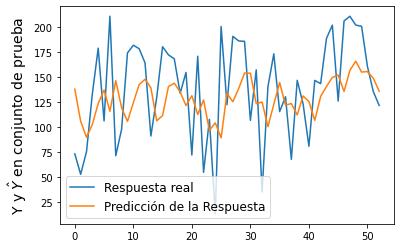

In [108]:
plt.plot(y_test)
plt.plot(prediction_test)
plt.legend(['Respuesta real','Predicción de la Respuesta'],loc="best", fontsize=12)
plt.ylabel('Y y $\hat{Y}$ en conjunto de prueba', fontsize=14)

Text(0, 0.5, '$\\hat{e}$ en conjunto de prueba')

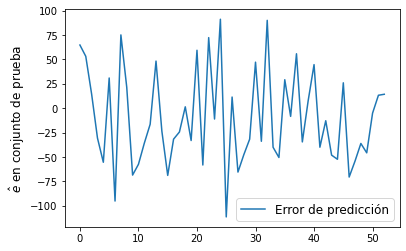

In [109]:
plt.plot(prediction_test-y_test)
plt.legend(['Error de predicción'],loc="best", fontsize=12)
plt.ylabel('$\hat{e}$ en conjunto de prueba', fontsize=12)

In [110]:
prediction_test-y_test

array([[  64.69439087],
       [  53.12384186],
       [  14.44094849],
       [ -30.5853653 ],
       [ -55.3730484 ],
       [  30.93342896],
       [ -95.10018158],
       [  75.06759644],
       [  21.46999359],
       [ -68.50355225],
       [ -57.46944427],
       [ -35.88195801],
       [ -16.44185486],
       [  48.25980835],
       [ -23.47318878],
       [ -68.83431244],
       [ -31.71045532],
       [ -24.37550964],
       [   1.40415344],
       [ -33.11077576],
       [  59.33414917],
       [ -58.19270325],
       [  72.28729401],
       [ -11.08240356],
       [  91.10991211],
       [-111.36088867],
       [  11.42243042],
       [ -65.43333282],
       [ -47.66112976],
       [ -31.72154846],
       [  47.14318237],
       [ -33.8842453 ],
       [  89.98637848],
       [ -39.98861847],
       [ -50.48851624],
       [  29.1593689 ],
       [  -8.38124847],
       [  55.75583038],
       [ -34.54479828],
       [   7.80368042],
       [  44.63695526],
       [ -39.970

**Resumen del rendimiento de los modelos usando el RMSE**

|Nommbre del modelo| RMSE obtenido |
|------------------|---------------|
|Suavizamiento exponencial|   57.29|
|Árboles de decisión|        52.201|     
|Red LSTM |                  47.75 |
|Red multicapa|              49.51 |      |